In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('Train.csv')

df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
df.shape

(8068, 11)

In [4]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [5]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [57]:
# filling categorical columns

missing_cat_cols = ['Ever_Married' , 'Graduated' , 'Profession' , 'Var_1']

for col in missing_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [58]:
df[missing_cat_cols].isna().sum()

Ever_Married    0
Graduated       0
Profession      0
Var_1           0
dtype: int64

In [59]:
# filling numerical columns

missing_num_cols = ['Work_Experience' , 'Family_Size']

for col in missing_num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [60]:
df[missing_num_cols].isna().sum()

Work_Experience    0
Family_Size        0
dtype: int64

In [61]:
# Remove Irrelevant Features
df = df.drop('ID' , axis = 1)

In [62]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


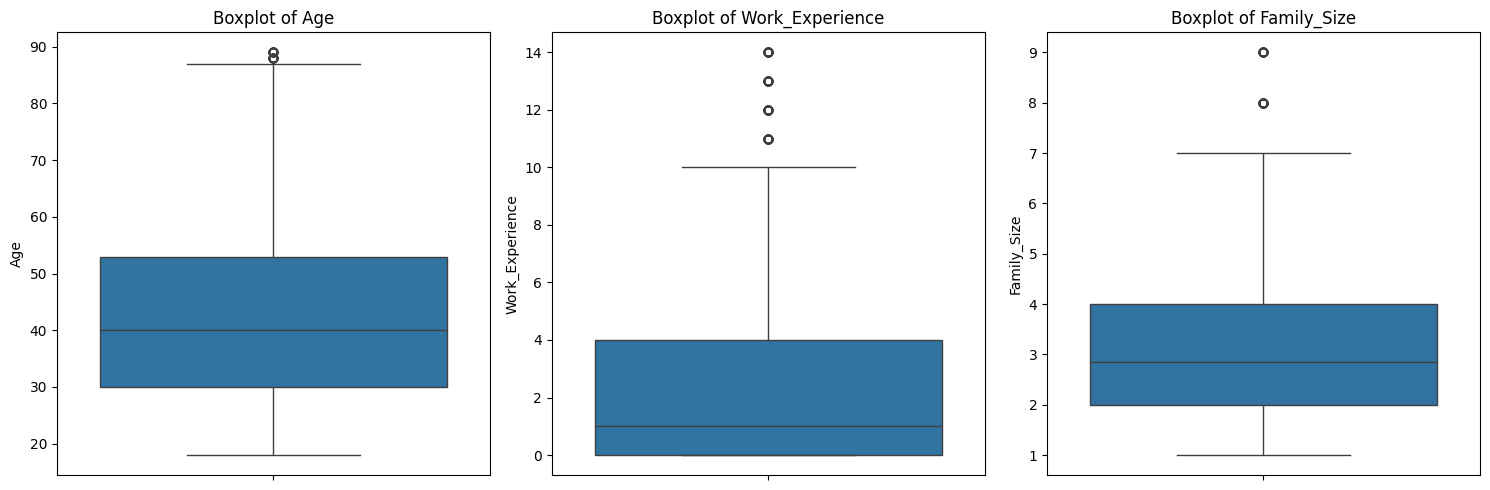

In [12]:
numerical_cols = ['Age', 'Work_Experience', 'Family_Size']
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [63]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Removing outliers
df_cleaned = remove_outliers(df, numerical_cols)

In [64]:
df_cleaned.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


In [65]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Binary encoding
df_cleaned['Gender'] = df_cleaned['Gender'].map({'Male': 1, 'Female': 0})
df_cleaned['Ever_Married'] = df_cleaned['Ever_Married'].map({'Yes': 1, 'No': 0})
df_cleaned['Graduated'] = df_cleaned['Graduated'].map({'Yes': 1, 'No': 0})

# Ordinal encoding for Spending_Score
spending_order = ['Low', 'Average', 'High']
df_cleaned['Spending_Score'] = OrdinalEncoder(categories=[spending_order]).fit_transform(df_cleaned[['Spending_Score']])

# One-hot encoding for Profession and Var_1
df_cleaned = pd.get_dummies(df_cleaned, columns=['Profession', 'Var_1'], drop_first=True)

In [66]:
df_cleaned.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Doctor,Profession_Engineer,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.000000,0.0,4.0,D,False,False,...,True,False,False,False,False,False,True,False,False,False
1,0,1,38,1,2.641663,1.0,3.0,A,False,True,...,False,False,False,False,False,False,True,False,False,False
2,0,1,67,1,1.000000,0.0,1.0,B,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,67,1,0.000000,2.0,2.0,B,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0,1,40,1,2.641663,2.0,6.0,A,False,False,...,False,False,False,False,False,False,False,False,True,False


In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cleaned['Age'] = scaler.fit_transform(df_cleaned[['Age']])

In [68]:
df_cleaned.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Doctor,Profession_Engineer,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,0.057971,0,1.000000,0.0,4.0,D,False,False,...,True,False,False,False,False,False,True,False,False,False
1,0,1,0.289855,1,2.641663,1.0,3.0,A,False,True,...,False,False,False,False,False,False,True,False,False,False
2,0,1,0.710145,1,1.000000,0.0,1.0,B,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,0.710145,1,0.000000,2.0,2.0,B,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0,1,0.318841,1,2.641663,2.0,6.0,A,False,False,...,False,False,False,False,False,False,False,False,True,False


In [69]:
# Final data (parameters to functions)
df_cleaned = df_cleaned.drop('Segmentation' , axis = 1)
X = df_cleaned.values.astype(float)

In [70]:
from sklearn.decomposition import PCA

def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(X)
    
    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='tab10', s=50)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.show()

# Base Model (K-Means)

Cluster
1    3233
2    1597
0    1516
3    1374
Name: count, dtype: int64


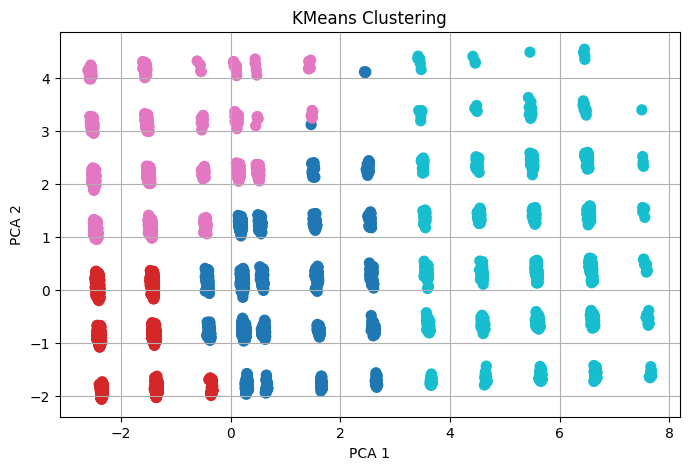

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

df_clusters = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
print(df_clusters['Cluster'].value_counts())

plot_clusters(X, kmeans_labels, "KMeans Clustering")

# =======================================================================================================================

# Possibilistic C-Means (PCM)

In [27]:
from PossibilisticCMeans import pcm

centroids, membership = pcm(X, k=3, m=2.0, eta=0.5, max_iter=100)

# Get hard cluster assignments
labels = np.argmax(membership, axis=1)
df_cleaned['Cluster'] = labels

print("Cluster centroids:\n", centroids)
print("\nSample cluster assignments:\n", df_cleaned['Cluster'].value_counts())

Cluster centroids:
 [[0.59359307 0.7154669  0.41658441 0.7442346  0.82769292 0.57866433
  2.49364161 0.07520822 0.06482941 0.11185738 0.05005525 0.10854007
  0.01006305 0.06800658 0.02375324 0.02712789 0.06739963 0.07901004
  0.00524377 0.79051316 0.01629412]
 [0.59359349 0.71546721 0.41658402 0.74423376 0.82769248 0.57866706
  2.49365174 0.07520828 0.06482941 0.1118574  0.0500556  0.10854063
  0.01006307 0.06800629 0.02375323 0.027128   0.06739978 0.07901026
  0.00524377 0.79051264 0.01629414]
 [0.5935913  0.71547261 0.41658966 0.74424496 0.82767847 0.5786562
  2.49356682 0.07520724 0.06482884 0.11185646 0.05005317 0.10853286
  0.0100627  0.0680091  0.02375278 0.02712665 0.06739743 0.07900701
  0.00524371 0.79052032 0.01629371]]

Sample cluster assignments:
 Cluster
1    5272
2    1671
0     777
Name: count, dtype: int64


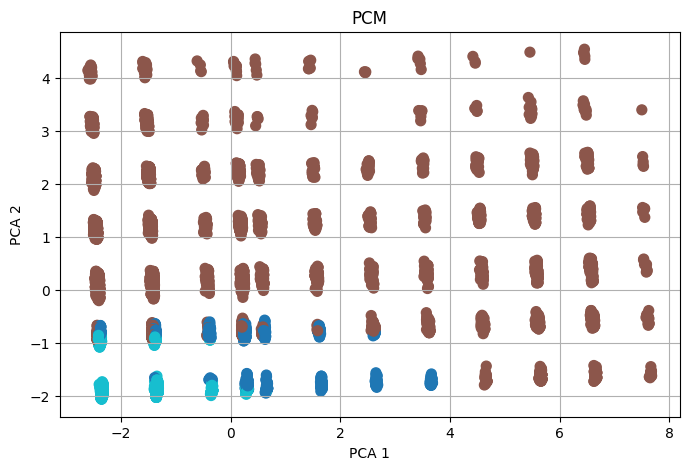

In [28]:
plot_clusters(X , labels , title = 'PCM')

# =======================================================================================================================

# Bisecting KMeans

Bisecting_Cluster
2    3178
1    1863
0    1566
3    1113
Name: count, dtype: int64


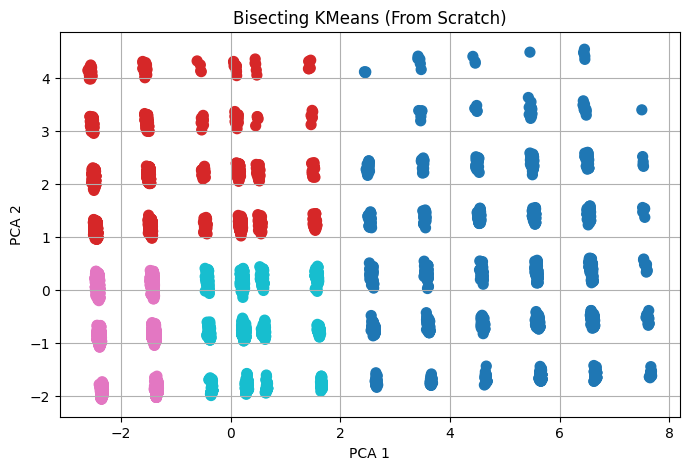

In [29]:
from Bisecting_KMeans import bisecting_kmeans 

bisect_labels = bisecting_kmeans(X, final_k=4)

df_clusters = pd.DataFrame(bisect_labels, columns=['Bisecting_Cluster'])
print(df_clusters['Bisecting_Cluster'].value_counts())

plot_clusters(X, bisect_labels, title="Bisecting KMeans (From Scratch)")

# =======================================================================================================================

# FCM

In [33]:
from FCM import FuzzyCMeans

model_FCM = FuzzyCMeans(n_clusters = 4,max_iter=20)
model_FCM.fit(X)
pred = model_FCM.predict(X)

FCM
2    2369
0    2348
1    1629
3    1374
Name: count, dtype: int64


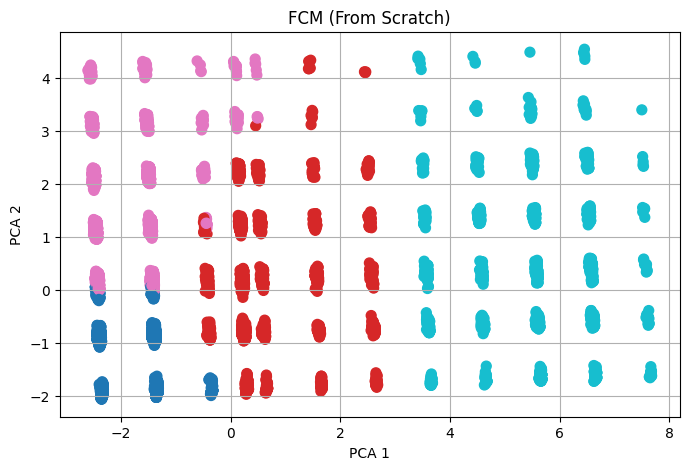

In [34]:
df_clusters_FCM = pd.DataFrame(pred, columns=['FCM'])
print(df_clusters_FCM['FCM'].value_counts())

plot_clusters(X, pred, title="FCM (From Scratch)")

# =======================================================================================================================

# PAM

In [115]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_clusters_with_centers(X, labels, title, medoids=None, medoid_labels=None):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(X)
    
    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='tab10', s=50)

    if medoids is not None and medoid_labels is not None:
        medoid_points = pca.transform(medoids)
        cmap = plt.cm.get_cmap('tab10')
        for point, label in zip(medoid_points, medoid_labels):
            plt.scatter(point[0], point[1], color=cmap(label), 
                        marker='X', s=200, edgecolors='black', linewidths=1.5)

    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.show()


# just need import pam here

In [109]:
pam = PAM(n_clusters=4, max_iter=50)
labels = pam.fit_predict(X)

PAM iterations:   8%|▊         | 4/50 [00:00<00:06,  7.40it/s]


break


In [117]:
pam.get_medoids(X)

array([[0.        , 0.        , 0.28985507, 1.        , 1.        ,
        0.        , 2.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.27536232, 1.        , 8.        ,
        0.        , 2.85012285, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 0.53623188, 1.        , 1.        ,
        1.        , 2.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 0.49275362, 1.        , 2.        ,
        1.        , 4.        , 0.        , 0.       

PAM
2    2105
0    2093
3    2036
1    1486
Name: count, dtype: int64


/tmp/ipykernel_35/3045867817.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


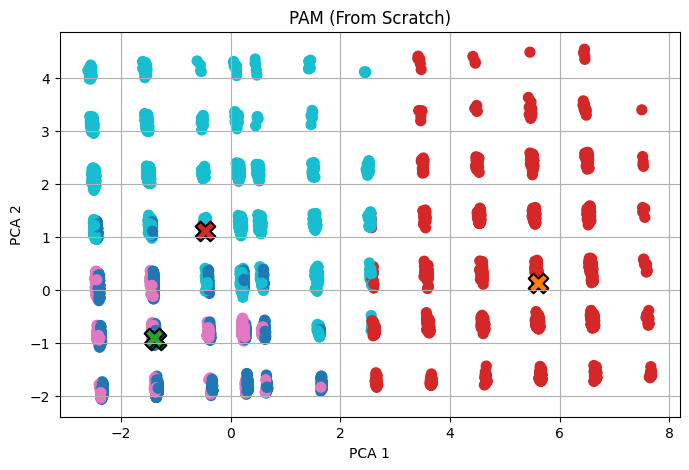

In [116]:
df_clusters_PAM = pd.DataFrame(labels, columns=['PAM'])
print(df_clusters_PAM['PAM'].value_counts())

medoid_labels = np.arange(pam.n_clusters)
plot_clusters_with_centers(
    X, 
    labels=pam.labels, 
    title="PAM (From Scratch)", 
    medoids=pam.get_medoids(X), 
    medoid_labels=medoid_labels
)


In [94]:
!pip install scikit-learn-extra

In [96]:
from sklearn_extra.cluster import KMedoids

# PAM built-in

In [118]:
kmedoids = KMedoids(n_clusters=4, random_state=0, method='pam').fit(X)
labels2 = kmedoids.labels_

PAM
3    3046
1    2016
2    1365
0    1293
Name: count, dtype: int64


/tmp/ipykernel_35/3045867817.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


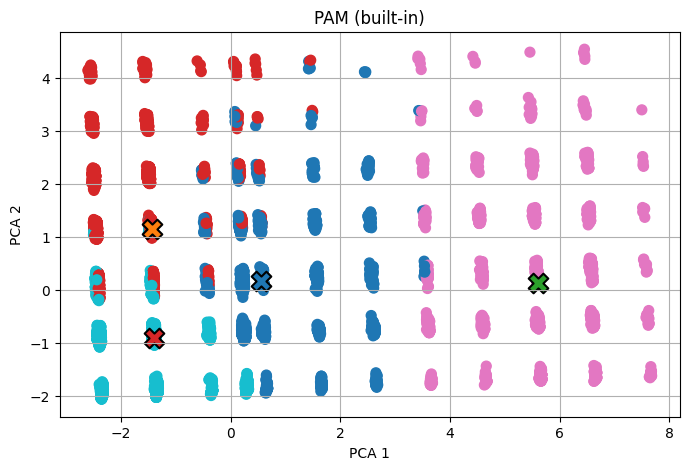

In [119]:
df_clusters_PAM = pd.DataFrame(labels2, columns=['PAM'])
print(df_clusters_PAM['PAM'].value_counts())

medoids = X[kmedoids.medoid_indices_]
medoid_labels = np.arange(kmedoids.n_clusters)

plot_clusters_with_centers(
    X, 
    labels=labels2, 
    title="PAM (built-in)", 
    medoids=medoids, 
    medoid_labels=medoid_labels
)